In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv("D:/Data_mining_assessment_dataset/df_reduced.csv", sep = ';')

#importing file and define the basic information of the dataframe
num_observations = df.shape[0]
num_variables = df.shape[1]

# Check variable types of the dataframe
variable_types = df.dtypes

print("Number of Observations (Rows):", num_observations)
print("Number of Variables (Columns):", num_variables)
print("\nVariable Types:")
print(variable_types)

Number of Observations (Rows): 12402
Number of Variables (Columns): 300

Variable Types:
Info_PepID           object
Info_organism_id      int64
Info_protein_id      object
Info_pos              int64
Info_AA              object
                     ...   
feat_esm1b_285      float64
feat_esm1b_286      float64
feat_esm1b_287      float64
feat_esm1b_288      float64
feat_esm1b_289      float64
Length: 300, dtype: object


In [4]:
#counting number of elements present in different datatypes of the dataframe
int_count = 0
float_count = 0
string_count = 0
for column in df.columns:
    if df[column].dtype == 'int64':  
        int_count += 1
    elif df[column].dtype == 'float64': 
        float_count += 1
    elif df[column].dtype == 'object':
        string_count +=1
print("Number of integer columns:", int_count)
print("Number of float columns:", float_count)
print("Number of string columns:", string_count)

Number of integer columns: 4
Number of float columns: 290
Number of string columns: 6


In [5]:
duplicate_rows = df[df.duplicated()]

# Print or display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Info_PepID, Info_organism_id, Info_protein_id, Info_pos, Info_AA, Info_epitope_id, Info_nPos, Info_nNeg, Info_cluster, Class, feat_esm1b_0, feat_esm1b_1, feat_esm1b_2, feat_esm1b_3, feat_esm1b_4, feat_esm1b_5, feat_esm1b_6, feat_esm1b_7, feat_esm1b_8, feat_esm1b_9, feat_esm1b_10, feat_esm1b_11, feat_esm1b_12, feat_esm1b_13, feat_esm1b_14, feat_esm1b_15, feat_esm1b_16, feat_esm1b_17, feat_esm1b_18, feat_esm1b_19, feat_esm1b_20, feat_esm1b_21, feat_esm1b_22, feat_esm1b_23, feat_esm1b_24, feat_esm1b_25, feat_esm1b_26, feat_esm1b_27, feat_esm1b_28, feat_esm1b_29, feat_esm1b_30, feat_esm1b_31, feat_esm1b_32, feat_esm1b_33, feat_esm1b_34, feat_esm1b_35, feat_esm1b_36, feat_esm1b_37, feat_esm1b_38, feat_esm1b_39, feat_esm1b_40, feat_esm1b_41, feat_esm1b_42, feat_esm1b_43, feat_esm1b_44, feat_esm1b_45, feat_esm1b_46, feat_esm1b_47, feat_esm1b_48, feat_esm1b_49, feat_esm1b_50, feat_esm1b_51, feat_esm1b_52, feat_esm1b_53, feat_esm1b_54, feat_esm1b_55, fe

##### This dataframe does not contain any duplicate values. Neither in information columns nor in features columns

In [6]:
#We are dividing the dataframe in information and features because while training the dataset, we do not required information section.
#Using iloc, we divide the dataset.
#NOTE : the feature dataset contains Class and one column name 'Info_cluster' because we will be using it on later part
info_df = df.iloc[:, :9]  
feat_df = df.iloc[:, 8:]  
info_df

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_nPos,Info_nNeg,Info_cluster
0,XP_815234.1:14,5693,XP_815234.1,283,S,406709,0,1,188
1,XP_811525.1:1,5693,XP_811525.1,9,L,339305,0,1,32
2,XP_819902.1:4,5693,XP_819902.1,96,G,295341,0,1,64
3,XP_808204.1:14,5693,XP_808204.1,282,Y,315639,0,1,102
4,XP_820015.1:10,5693,XP_820015.1,242,A,"244573,390576","0,0","1,1",211
...,...,...,...,...,...,...,...,...,...
12397,XP_805059.1:20,5693,XP_805059.1,357,P,316771,0,1,46
12398,XP_804612.1:6,5693,XP_804612.1,354,E,408859,0,1,36
12399,XP_812323.1:52,5693,XP_812323.1,1331,A,343635,0,1,160
12400,XP_808278.1:18,5693,XP_808278.1,452,Q,"413023,323930","0,0","1,1",103


In [7]:
feat_df

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,188,-1,-0.050457,0.350820,0.081111,0.292722,-0.046843,-0.316361,0.205464,-0.164362,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,32,-1,0.200686,-0.200323,-0.367348,-0.286893,-0.289697,-0.061222,-0.441129,0.103984,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,64,-1,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,102,-1,0.150502,0.247198,0.155206,0.029653,0.117658,-0.185720,-0.206774,0.056524,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,211,-1,0.247700,-0.045094,-0.017004,-0.282002,-0.001418,-0.162899,-0.159904,-0.414519,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12397,46,-1,0.245804,0.466037,0.321277,-0.055060,0.201123,-0.222481,-0.182648,0.022854,...,0.010504,0.231793,-0.049883,0.260013,0.066875,-0.362300,-0.468976,0.135828,-0.016245,0.365967
12398,36,-1,0.006633,0.024325,0.021564,0.114774,0.075034,-0.408322,-0.144037,-0.176111,...,0.378880,0.233636,-0.018080,-0.402595,0.277612,-0.098770,-0.243120,-0.286025,-0.277661,-0.145548
12399,160,-1,-0.055652,0.128918,0.062364,0.053716,-0.144050,-0.142040,0.084657,-0.070034,...,0.022624,0.134560,-0.113434,-0.266736,0.150910,0.415144,-0.289739,0.155924,-0.167771,0.236386
12400,103,-1,0.193741,0.363251,0.067202,0.200280,-0.168712,-0.037630,-0.051108,0.063174,...,0.189327,0.099029,0.001823,0.276265,-0.282017,0.373733,0.002096,0.082542,0.168576,0.362109


In [8]:
# Here we divide the feature and make new dataframe such that it only contains Info_cluster and Class columns.
df_clusterclass = feat_df[['Info_cluster','Class']]
df_clusterclass

,Info_cluster,Class
0,188,-1
1,32,-1
2,64,-1
3,102,-1
4,211,-1
...,...,...
12397,46,-1
12398,36,-1
12399,160,-1
12400,103,-1


In [9]:
# This dataset purely consist only features and we will be mostly work on this set. 
feat_only_df  = feat_df.drop(['Info_cluster','Class'],axis=1)
feat_only_df

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,-0.050457,0.350820,0.081111,0.292722,-0.046843,-0.316361,0.205464,-0.164362,-0.125390,-0.156784,...,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,0.200686,-0.200323,-0.367348,-0.286893,-0.289697,-0.061222,-0.441129,0.103984,-0.336376,-0.232301,...,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,-0.405301,-0.347159,...,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,0.150502,0.247198,0.155206,0.029653,0.117658,-0.185720,-0.206774,0.056524,-0.077987,0.028505,...,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,0.247700,-0.045094,-0.017004,-0.282002,-0.001418,-0.162899,-0.159904,-0.414519,-0.513792,0.041919,...,0.294608,0.092545,-0.244902,-0.222112,-0.148792,0.061015,0.061460,-0.151051,-0.208596,0.079564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12397,0.245804,0.466037,0.321277,-0.055060,0.201123,-0.222481,-0.182648,0.022854,-0.361306,0.055859,...,0.010504,0.231793,-0.049883,0.260013,0.066875,-0.362300,-0.468976,0.135828,-0.016245,0.365967
12398,0.006633,0.024325,0.021564,0.114774,0.075034,-0.408322,-0.144037,-0.176111,-0.342193,-0.296429,...,0.378880,0.233636,-0.018080,-0.402595,0.277612,-0.098770,-0.243120,-0.286025,-0.277661,-0.145548
12399,-0.055652,0.128918,0.062364,0.053716,-0.144050,-0.142040,0.084657,-0.070034,-0.256291,0.007682,...,0.022624,0.134560,-0.113434,-0.266736,0.150910,0.415144,-0.289739,0.155924,-0.167771,0.236386
12400,0.193741,0.363251,0.067202,0.200280,-0.168712,-0.037630,-0.051108,0.063174,0.092369,0.048575,...,0.189327,0.099029,0.001823,0.276265,-0.282017,0.373733,0.002096,0.082542,0.168576,0.362109


In [10]:
# We are spliting the dataset into training and test set such that 80 percent data will trained and 20 percent data will be for testing
# If you see thoroughly, we are stratifying the dataset on the basis of 'Info_cluster'
train_feat_df, test_feat_df = train_test_split(feat_df, test_size=0.2,stratify=feat_df['Info_cluster'], random_state=42)
test_feat_df.shape

(2481, 292)

In [11]:

train_feat_df

,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
1380,133,-1,0.023255,0.140630,0.259471,0.216382,0.054747,-0.064916,-0.260543,0.080375,...,0.154079,0.253338,-0.186254,0.510995,-0.053482,0.144445,-0.002697,0.257663,-0.320665,0.010839
3995,168,-1,-0.059623,0.081023,0.033723,-0.073021,0.170036,-0.017027,-0.041450,0.200669,...,0.240399,0.233510,0.196454,-0.146785,0.254955,0.357822,-0.101534,0.015532,-0.026561,0.304389
8683,165,-1,-0.045928,0.123546,-0.058769,0.333141,0.179465,-0.323112,0.055298,0.184604,...,0.412560,0.258545,0.063443,0.080428,0.001911,0.227838,0.139499,-0.223463,-0.085601,0.153609
2836,237,-1,0.198449,0.300430,0.209989,0.009874,-0.135588,-0.289777,-0.186011,0.152740,...,-0.083302,-0.067410,0.101871,0.172266,0.299253,0.047873,-0.406339,0.034837,0.152048,0.184087
6674,121,-1,0.005600,0.168202,0.105676,-0.248348,-0.183606,-0.213992,-0.147158,-0.102100,...,-0.008836,0.253181,0.038404,-0.038728,0.187455,-0.178443,0.248350,-0.067668,0.017991,0.251896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,124,-1,0.052640,0.467918,0.033295,0.108707,-0.136490,-0.133409,-0.025271,-0.068689,...,0.277964,0.053161,-0.171618,0.130526,0.214888,0.183277,-0.180251,-0.066499,0.182884,0.163642
1728,14,-1,0.063162,0.084133,-0.239400,0.018559,0.052749,-0.331566,0.092595,0.213950,...,-0.122304,0.108443,0.081247,-0.329146,0.243531,-0.006927,-0.140350,-0.275313,-0.043985,0.212701
1135,278,-1,-0.036675,0.155537,-0.227392,0.449062,0.336923,-0.458683,0.034574,0.127521,...,0.303502,0.325532,-0.168477,0.047289,0.079468,0.088897,0.026688,-0.166317,-0.033279,0.077972
1211,172,-1,0.046869,0.634133,0.148021,-0.141794,0.002121,0.123213,-0.078749,0.323970,...,0.015774,0.213614,-0.424222,-0.259752,-0.533587,-0.354047,-0.145802,-0.263079,-0.040537,0.345153


In [12]:
# Again we divide the split dataset such that it one contain purely features and other one contains class and info_cluster
train_infoclass = train_feat_df[['Info_cluster','Class']]
train_infoclass

,Info_cluster,Class
1380,133,-1
3995,168,-1
8683,165,-1
2836,237,-1
6674,121,-1
...,...,...
2129,124,-1
1728,14,-1
1135,278,-1
1211,172,-1


In [13]:
train_feat_only_df = train_feat_df.drop(['Info_cluster','Class'],axis=1)
train_feat_only_df

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
1380,0.023255,0.140630,0.259471,0.216382,0.054747,-0.064916,-0.260543,0.080375,-0.109487,-0.402776,...,0.154079,0.253338,-0.186254,0.510995,-0.053482,0.144445,-0.002697,0.257663,-0.320665,0.010839
3995,-0.059623,0.081023,0.033723,-0.073021,0.170036,-0.017027,-0.041450,0.200669,-0.144452,-0.386983,...,0.240399,0.233510,0.196454,-0.146785,0.254955,0.357822,-0.101534,0.015532,-0.026561,0.304389
8683,-0.045928,0.123546,-0.058769,0.333141,0.179465,-0.323112,0.055298,0.184604,-0.067546,-0.297256,...,0.412560,0.258545,0.063443,0.080428,0.001911,0.227838,0.139499,-0.223463,-0.085601,0.153609
2836,0.198449,0.300430,0.209989,0.009874,-0.135588,-0.289777,-0.186011,0.152740,-0.436255,-0.116423,...,-0.083302,-0.067410,0.101871,0.172266,0.299253,0.047873,-0.406339,0.034837,0.152048,0.184087
6674,0.005600,0.168202,0.105676,-0.248348,-0.183606,-0.213992,-0.147158,-0.102100,-0.003359,-0.017031,...,-0.008836,0.253181,0.038404,-0.038728,0.187455,-0.178443,0.248350,-0.067668,0.017991,0.251896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,0.052640,0.467918,0.033295,0.108707,-0.136490,-0.133409,-0.025271,-0.068689,-0.230588,-0.141884,...,0.277964,0.053161,-0.171618,0.130526,0.214888,0.183277,-0.180251,-0.066499,0.182884,0.163642
1728,0.063162,0.084133,-0.239400,0.018559,0.052749,-0.331566,0.092595,0.213950,-0.360413,0.007564,...,-0.122304,0.108443,0.081247,-0.329146,0.243531,-0.006927,-0.140350,-0.275313,-0.043985,0.212701
1135,-0.036675,0.155537,-0.227392,0.449062,0.336923,-0.458683,0.034574,0.127521,-0.073461,-0.194981,...,0.303502,0.325532,-0.168477,0.047289,0.079468,0.088897,0.026688,-0.166317,-0.033279,0.077972
1211,0.046869,0.634133,0.148021,-0.141794,0.002121,0.123213,-0.078749,0.323970,0.112959,-0.118763,...,0.015774,0.213614,-0.424222,-0.259752,-0.533587,-0.354047,-0.145802,-0.263079,-0.040537,0.345153


### Counting missing values

In [14]:
missing_values = train_feat_df.isnull().sum().sum()
print("Total missing values:", missing_values)

Total missing values: 12165


In [15]:
# Amount of missing values in the feature's training dataset only and show the percentage of it in descending order.

missing_values_per_column = train_feat_only_df.isnull().sum()
missing_percentage = train_feat_only_df.isnull().sum()/len(train_feat_only_df)*100
missing_percentage.sort_values(ascending= False)

feat_esm1b_148    89.628062
feat_esm1b_0       0.120956
feat_esm1b_178     0.120956
feat_esm1b_142     0.120956
feat_esm1b_143     0.120956
                    ...    
feat_esm1b_214     0.090717
feat_esm1b_277     0.080637
feat_esm1b_270     0.080637
feat_esm1b_114     0.080637
feat_esm1b_119     0.070557
Length: 290, dtype: float64

In [16]:
total_elements = train_feat_only_df.size
missing_values = train_feat_only_df.isnull().sum().sum()
total_percentage_missing = (missing_values / total_elements) * 100
total_percentage_missing

0.4228230608010177

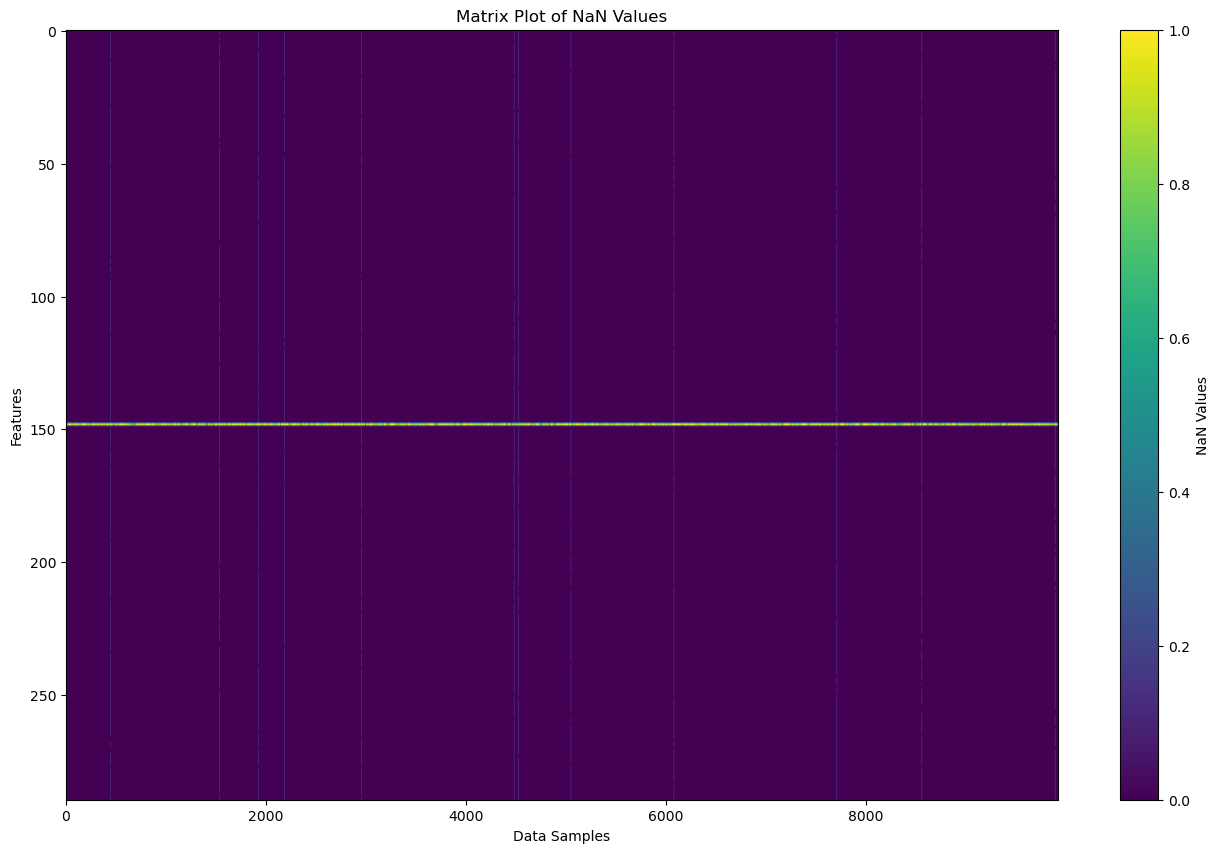

In [17]:
import seaborn as sns
plt.figure(figsize=(16, 10))
plt.imshow(train_feat_only_df.T.isnull(), aspect='auto', cmap='viridis')
plt.title('Matrix Plot of NaN Values')
plt.xlabel('Data Samples')
plt.ylabel('Features')
plt.colorbar(label='NaN Values')
plt.show()

### Variable imbalance. Use of min-max and visualization

In [ ]:
# Plotting graph for each feature column's range The blue dot show maximum point in a single column and corresponding orange dot 
# shows minimum point in the same feature's column.

max_values = train_feat_only_df.max()
min_values = train_feat_only_df.min()

# Plot maxima and minima values
plt.figure(figsize=(10, 6))
plt.plot(max_values, label='Max Values', marker='o')
plt.plot(min_values, label='Min Values', marker='x')
plt.xlabel('Features Columns')
plt.ylabel('Value')
plt.title('Maxima and Minima of Numerical Features')
plt.legend()
plt.margins(x=0)
plt.grid(True)
plt.show()

In [ ]:
# Histogram for the range value in the dataframe. 
ranges = max_values - min_values
plt.figure(figsize=(8, 6))
plt.hist(ranges, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Histogram of Ranges of Numerical Features')
plt.grid(True)
plt.margins(x=0)
plt.show()

### Class Imbalance

In [ ]:
#CLass balance is like masking the target class such that there will be 
class_counts = train_infoclass['Class'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.margins(x=0)
plt.show()

In [ ]:
class_balance = {}

for cluster in train_feat_df['Info_cluster'].unique():
    cluster_data = train_feat_df[train_feat_df['Info_cluster'] == cluster]
    class_balance[cluster] = len(cluster_data)

# Step 3: Print class balance under each Info_cluster
for cluster, count in class_balance.items():
    print(f"Info_cluster {cluster}: {count} samples")
total_samples = len(train_feat_df)
print(f"\nTotal samples: {total_samples}")

In [ ]:
# Class imbalance based on target 
clusters = list(class_balance.keys())
counts = list(class_balance.values())

plt.figure(figsize=(10, 6))
plt.bar(clusters, counts, color='skyblue')
plt.title('Class Balance Under Each Info_cluster')
plt.xlabel('Info_cluster')
plt.ylabel('Number of Samples')
plt.margins(x=0)
plt.xticks(clusters)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:

positive_clusters = set()
negative_clusters = set()

for cluster in train_feat_df['Info_cluster'].unique():
    cluster_data = train_feat_df[train_feat_df['Info_cluster'] == cluster]
    if (cluster_data > 0).any().any():
        positive_clusters.add(cluster)
    if (cluster_data < 0).any().any():
        negative_clusters.add(cluster)

# Step 4: Check overall class balance
overall_positive_values = (train_feat_df > 0).any().any()  # Check if any positive values exist in the DataFrame
overall_negative_values = (train_feat_df < 0).any().any()  # Check if any negative values exist in the DataFrame

print("\nOverall Class Balance:")
print(f"Positive Values: {overall_positive_values}")
print(f"Negative Values: {overall_negative_values}")

## Handling Missing Value

Using KNN imputer to missing value, we use the method of mean to substitute NaN value. The other method we can use is median.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(train_feat_only_df), columns=train_feat_only_df.columns)

n_clusters = 30 
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(df_imputed)
df_imputed

In [ ]:
total_elements = df_imputed.size
missing_values = df_imputed.isnull().sum().sum()
total_percentage_imputed = (missing_values / total_elements) * 100
total_percentage_imputed

To verify the missing value, we apply the missing values code again and we observed that there are 0 percent of missing value.

## Outliers

outlier is an observation or data point that deviates significantly from other observations in a dataset. It is typically a data point that lies far away from the other data points. Outliers can occur due to various reasons, including measurement error, natural variability in the data, or rare events.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
outlier_scores = lof.fit_predict(scaled_data)
outliers = df_imputed[outlier_scores == -1]
print("Identified outliers:")
outliers

In [ ]:
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=outlier_scores, cmap='viridis')
plt.title('Outlier Visualization (Before Cleaning)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Outlier Score')
plt.grid(True)
plt.show()

There are 290 outlier in the given dataframe, our contamination level is 2 percent and above plot uses PCA technique to plot outlier in such high dimensional dataframe.

In [ ]:
df_imputed

In [ ]:
train_infoclass.reset_index(drop=True, inplace=True)
df_imputed_concat1 = pd.concat([train_infoclass , df_imputed], axis=1)


df_imputed_concat1


In [ ]:
outlier_indices = outlier_scores == -1

cleaned_abod_df = df_imputed_concat1[~outlier_indices]
print("Shape of cleaned DataFrame after removing outliers:", cleaned_abod_df.shape)

In [ ]:
cleaned_abod_df

In [ ]:
reduced_data_abod_cleaned = reduced_data[~outlier_indices]

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_abod_cleaned[:, 0], reduced_data_abod_cleaned[:, 1], c='yellow')
plt.title('Outlier Visualization (After Removal)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Outlier Score')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Step 2: Define columns to scale (exclude 'Info_cluster' and 'Class')
columns_to_scale = [col for col in cleaned_abod_df.columns if col not in ['Info_cluster', 'Class']]

# Step 3: Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(cleaned_abod_df[columns_to_scale])

# Step 4: Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=cleaned_abod_df.index)

# Step 5: Merge scaled data with the non-scaled columns
merged_df = pd.concat([scaled_df, cleaned_abod_df[['Info_cluster', 'Class']]], axis=1)

In [ ]:
max_values = scaled_df.max()
min_values = scaled_df.min()

# Plot maxima and minima values
plt.figure(figsize=(10, 6))
plt.plot(max_values, label='Max Values', marker='o')
plt.plot(min_values, label='Min Values', marker='x')
plt.xlabel('Features Columns')
plt.ylabel('Value')
plt.title('Maxima and Minima of Numerical Features')
plt.legend()
plt.margins(x=0)
plt.grid(True)
plt.show()

## Class Imbalance

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_balance_data = scaler.fit_transform(cleaned_abod_df)

# Class Imbalance
class_counts = cleaned_abod_df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(cleaned_abod_df, cleaned_abod_df['Class'])
print("Balanced Class Distribution:")
print(pd.Series(y_resampled).value_counts())

In [ ]:
df_infoclass1 = X_resampled[['Info_cluster', 'Class']]
df_infoclass1

In [ ]:
#Plotting bar graph after balancing the class.
class_counts = df_infoclass1['Class'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.margins(x=0)
plt.show()

In [ ]:
unmerged_df = X_resampled.drop(['Info_cluster','Class'], axis = 1)
unmerged_df

### PCA
Applying pca for reducing our high dimensional dataframe. The number of coloumn changes depending on the number of component we are choosing (eg-0.95) and converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation[1] \
Note: The number of rows will remain same.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_reduct_data = scaler.fit_transform(unmerged_df)

pca = PCA(n_components=0.95) 
pca_result = pca.fit_transform(scaled_reduct_data)

# Step 3: Analyze the results
print("Original shape:", unmerged_df.shape)
print("Reduced shape:", pca_result.shape)

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# PCA return the value in array form and therefore we required to tranform this into dataframe with coloumn name as before.
pca_result

In [ ]:
# Converting arrays to dataframe
pca_result_df = pd.DataFrame(pca_result, columns=[f"feat_esm1b_{i}" for i in range(0, pca_result.shape[1] + 0)])
pca_result_df

In [ ]:
df_infoclass1.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames again
concatenated_df_pca = pd.concat([df_infoclass1, pca_result_df], axis=1)

concatenated_df_pca

### Balancing the class

The element in target class that is 1 and -1. The number of element -1 is extremely huge as compare to element 1. Here the balancing is required to reduce the risk of over-fitting. SMOTE helps to balance the class distribution of the dataset, which can improve the performance of machine learning models. SMOTE generates a new synthetic example by linearly interpolating between the feature values of the template sample and the neighbor.

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
X_resampled_reduced, y_resampled_reduced = smote.fit_resample(concatenated_df_pca, concatenated_df_pca['Class'])
print("Balanced Class Distribution:")
print(pd.Series(y_resampled_reduced).value_counts())

In [ ]:
X_resampled_reduced

In [ ]:
y_resampled_reduced

In [ ]:
concatenate_df_pca_infoclass = concatenated_df_pca[['Info_cluster','Class']]
concatenate_df_pca_infoclass

In [ ]:
concatenated_df_pca_feat = concatenated_df_pca.drop(['Info_cluster','Class'],axis = 1)
concatenated_df_pca_feat

### Preliminary Testing
Here, we are spliting our cleaned data into 80-20 percent and performing the accuracy test using decision tree classifier.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split the data into train and validation sets
X1_train, X1_val, y1_train, y1_val = train_test_split(concatenated_df_pca_feat, concatenated_df_pca['Class'], test_size=0.2, random_state=42)

# Step 2: Fit a decision tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X1_train, y1_train)

# Step 3: Predict the target variable on the validation set
y1_pred = clf.predict(X1_val)

# Step 4: Evaluate the model
accuracy = accuracy_score(y1_val, y1_pred)
print("Accuracy:", accuracy)
# Generate classification report
report = classification_report(y1_val, y1_pred)

# Print the classification report
print("Classification Report:")
print(report)

The accuracy is 98.3 percent for preliminary test. \
Note: If SMOTE is not implemented then it may produce over-fitting result and produces accuracy of 100 percent.

In [ ]:
from sklearn.model_selection import GroupShuffleSplit


n_splits = 5  # You can adjust this as needed
group_shuffle_split = GroupShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Split the data into train and test sets using grouped splitting
for train_idx, test_idx in group_shuffle_split.split(concatenated_df_pca, concatenated_df_pca['Class'], groups=concatenated_df_pca['Info_cluster']):
    X2_train, X2_test = concatenated_df_pca.iloc[train_idx], concatenated_df_pca.iloc[test_idx]
    y2_train, y2_test = concatenated_df_pca['Class'].iloc[train_idx], concatenated_df_pca['Class'].iloc[test_idx]

Group shuffle - Group shuffle splitting is useful when you have data that is grouped or clustered in some way, and you want to ensure that these groups or clusters are preserved in both the training and testing sets.

## Hyperparameters 
Hyperparameters are points of choice or configuration that allow a machine learning model to be customized for a specific task or dataset.[2] \
The two of the simplest and most common methods are random search and grid search \
Random Search - Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain \
Grid Search - Define a search space as a grid of hyperparameter values and evaluate every position in the grid 

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the classifier and parameter grid
clf = DecisionTreeClassifier(random_state=42)  # corrected syntax
param_grid = {'max_depth': [3, 5, 7]}

# Define GroupKFold cross-validation
group_kfold = GroupKFold(n_splits=5)

# Perform Grid Search CV
grid_search = GridSearchCV(clf, param_grid, scoring=make_scorer(accuracy_score), cv=group_kfold)
grid_search.fit(concatenated_df_pca_feat, concatenated_df_pca['Class'], groups=concatenated_df_pca['Info_cluster'])

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {'max_depth': randint(3, 10)}

# Perform Randomized Search CV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, scoring=make_scorer(accuracy_score), cv=group_kfold)
random_search.fit(concatenated_df_pca_feat, concatenated_df_pca['Class'], groups=concatenated_df_pca['Info_cluster'])

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

When We apply grid search with 3 parameter boundary for decision tree classifier.

In [ ]:
from sklearn.metrics import balanced_accuracy_score
best_model = grid_search.best_estimator_  # Change this to your best model

# Predict using the best model
y_pred = best_model.predict(concatenated_df_pca_feat)

# Calculate balanced accuracy on the full dataset (no test set in this case)
balanced_acc = balanced_accuracy_score(concatenated_df_pca['Class'], y_pred)

print("Balanced Accuracy:", balanced_acc)

In [ ]:
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(concatenated_df_pca_feat)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(concatenated_df_pca['Class'], y_pred)
print("Balanced Accuracy:", balanced_acc)

The balanced accuracy have been calculated for both hyperparameter value.

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the classifier and parameter grid
clf = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 5, 7]}

# Define GroupKFold cross-validation
group_kfold = GroupKFold(n_splits=5)

# Perform Grid Search CV
grid_search = GridSearchCV(clf, param_grid, scoring=make_scorer(accuracy_score), cv=group_kfold)
grid_search.fit(concatenated_df_pca_feat, concatenated_df_pca['Class'], groups=concatenated_df_pca['Info_cluster'])

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
from sklearn.model_selection import train_test_split, GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split data into features and target variable
X = concatenated_df_pca_feat
y = concatenate_df_pca_infoclass['Class']
groups = concatenate_df_pca_infoclass['Info_cluster']

# Split data into training and testing sets (stratified based on the target variable)
X_train, X_test, y_train, y_test, groups_train, groups_test = train_test_split(X, y, groups, test_size=0.2, random_state=42, stratify=y)

group_kfold = GroupKFold(n_splits=5)

# Claassifiers 
classifiers = {
    'Random Forest': RandomForestClassifier(),
    #'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}
for clf_name, clf in classifiers.items():
    print(f"Evaluating {clf_name}...")
    
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
# Calculate cross-validation and calculate balanced accuracy
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=group_kfold, scoring='balanced_accuracy', groups=groups_train)
    mean_balanced_accuracy = np.mean(cv_scores)
    print(f"Mean Balanced Accuracy: {mean_balanced_accuracy:.4f}")

 # Model fitting and printing accuracy and balanced accuracy
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print(f"Test Balanced Accuracy: {test_balanced_accuracy:.4f}")
    print()


In [ ]:
test_feat_df_infoclass = test_feat_df[['Info_cluster' , 'Class']]
test_feat_df_infoclass

In [ ]:
test_feat_df_new = test_feat_df.drop(['Info_cluster' , 'Class'], axis=1)
test_feat_df_new

#### Testing on the seen dataset which we split in the very begining which is not cleaned and contains features with target class

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

n_components = pca.n_components_

# preprocessing steps we are applying
preprocessing_steps = [
    ('imputer', KNNImputer(n_neighbors=30)),
    ('scaler', StandardScaler()),
    ('MinMax', MinMaxScaler()),
    ('pca', PCA(n_components=n_components))  # Dimension reduction
]

# Define the classifier
classifier = DecisionTreeClassifier(**grid_search.best_params_)

# Create=ing a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=preprocessing_steps)

# Create a full pipeline combining preprocessing and the classifier
pipeline = Pipeline(steps=[('preprocessing', preprocessing_pipeline), ('classifier', classifier)])

# Fit the pipeline to the training data
pipeline.fit(feat_df, info_df['Class'])

# Evaluate the pipeline on the test data
test_accuracy = pipeline.score(test_feat_df_new, test_feat_df_infoclass['Class'])
print("Test Accuracy:", test_accuracy)

In [ ]:
predicted_labels = pipeline.predict(test_feat_df_new)
balanced_accuracy = balanced_accuracy_score(test_feat_df_infoclass['Class'], predicted_labels)
print("Balanced Accuracy:", balanced_accuracy)

In [ ]:
pip install joblib

In [ ]:
preprocessing_pipeline

## Pipeline implementation on df_reduced_holdout dataset
This file contain 290 features and other information columns. When we apply pipeline, we need to keep number of features to be same with our trained dataset. This dataset does not contain any target column so hereby we predict on the basis of our trained model.

In [ ]:
df_new_data = pd.read_csv("C:/Users/DELL/Downloads/df_reduced_holdout/df_reduced_holdout.csv",sep  =";")

In [ ]:
# Dividing our testing into information column and features columns.
info_new_df = df_new_data.iloc[:, :9]  
feat_new_df = df_new_data.iloc[:, 9:]  
feat_new_df

In [ ]:
feat_new_df

In [ ]:
feat_new_array = feat_new_df.values

# Preprocess holdout data using the pipeline
preprocessed_holdout = pipeline['preprocessing'].transform(feat_new_array)

In [ ]:
# Applying pipeline to the new dataframe and generating the csv file such that it contains 3 columns name Info_PepID, Info_pos 
# and Prediction column which will carry our predicted values.

preprocessed_holdout = pipeline['preprocessing'].transform(feat_new_df)

# Predict classes for holdout data
predictions = pipeline['classifier'].predict(preprocessed_holdout)

# Create DataFrame with predictions
predictions_df = pd.DataFrame({
    'Info_PepID': info_new_df['Info_PepID'],
    'Info_pos': info_new_df['Info_pos'],
    'Prediction': predictions,
})

# Save predictions to CSV
predictions_df.to_csv("Karan_prediction.csv", index=False)

In [ ]:
# Counting number of 1 and -1 in prediction.
class_counts = predictions_df['Prediction'].value_counts()
print("Count of 1:", class_counts[1] if 1 in class_counts else 0)
print("Count of -1:", class_counts[-1] if -1 in class_counts else 0)

In [ ]:
# In percentage for better understanding
total_predictions = len(predictions_df)

percentage_1 = (class_counts[1] / total_predictions) * 100 if 1 in class_counts else 0
percentage_minus_1 = (class_counts[-1] / total_predictions) * 100 if -1 in class_counts else 0

print("Percentage of 1:", percentage_1)
print("Percentage of -1:", percentage_minus_1)

As we can observed that, the epitopes in T.Cruzi is approx 1 percent from 5612 samples. So, it is rare to find the such epitopes.

## References
-https://www.javatpoint.com/principal-component-analysis#:~:text=Principal%20Component%20Analysis%20is%20an,the%20help%20of%20orthogonal%20transformation.
-https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/